<a href="https://colab.research.google.com/github/swaraj-babu-beeda/Final-Project/blob/main/final_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q pennylane torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

Mounted at /content/drive
Using device: cpu
Epoch 1/75 - Loss: 141.1542 - Accuracy: 44.31%
Epoch 2/75 - Loss: 128.1209 - Accuracy: 55.13%
Epoch 3/75 - Loss: 115.6789 - Accuracy: 57.76%
Epoch 4/75 - Loss: 105.2733 - Accuracy: 59.80%
Epoch 5/75 - Loss: 98.8068 - Accuracy: 61.76%
Epoch 6/75 - Loss: 93.6431 - Accuracy: 62.61%
Epoch 7/75 - Loss: 89.5436 - Accuracy: 64.51%
Epoch 8/75 - Loss: 87.3324 - Accuracy: 65.34%
Epoch 9/75 - Loss: 84.4979 - Accuracy: 65.51%
Epoch 10/75 - Loss: 82.4329 - Accuracy: 67.23%
Epoch 11/75 - Loss: 80.4744 - Accuracy: 67.67%
Epoch 12/75 - Loss: 78.8898 - Accuracy: 68.44%
Epoch 13/75 - Loss: 76.8303 - Accuracy: 69.27%
Epoch 14/75 - Loss: 76.0438 - Accuracy: 69.68%
Epoch 15/75 - Loss: 73.7755 - Accuracy: 71.04%
Epoch 16/75 - Loss: 72.2208 - Accuracy: 72.08%
Epoch 17/75 - Loss: 71.2123 - Accuracy: 71.81%
Epoch 18/75 - Loss: 70.8257 - Accuracy: 72.02%
Epoch 19/75 - Loss: 69.3372 - Accuracy: 73.35%
Epoch 20/75 - Loss: 68.6589 - Accuracy: 73.29%
Epoch 21/75 - Loss: 6

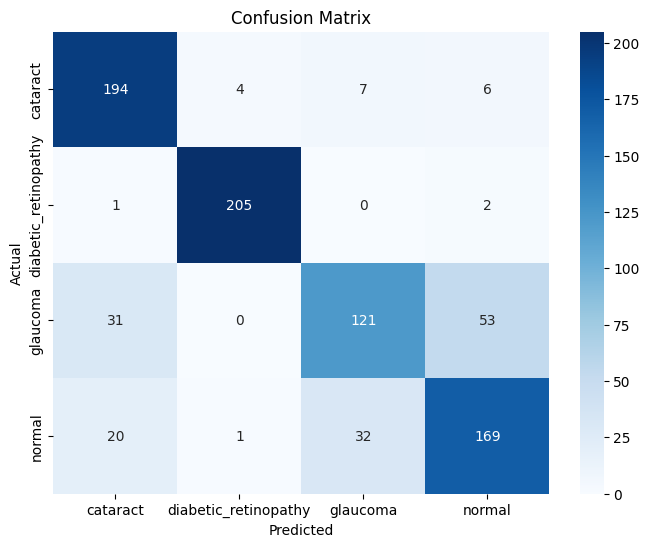


Classification Report:

                      precision    recall  f1-score   support

            cataract       0.79      0.92      0.85       211
diabetic_retinopathy       0.98      0.99      0.98       208
            glaucoma       0.76      0.59      0.66       205
              normal       0.73      0.76      0.75       222

            accuracy                           0.81       846
           macro avg       0.81      0.81      0.81       846
        weighted avg       0.81      0.81      0.81       846

✅ Model saved as hybrid_model.pth


In [ ]:
# === Install and Import Dependencies ===
!pip install pennylane torchvision seaborn --quiet

import pennylane as qml
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# === Mount Google Drive ===
drive.mount('/content/drive')

# === Device Setup ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# === Dataset Path ===
dataset_path = '/content/drive/MyDrive/dataset/'  # Update this path as needed

# === Transformations ===
train_val_transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# === Dataset and Loaders ===
dataset = datasets.ImageFolder(dataset_path, transform=train_val_transform)
class_names = dataset.classes
num_classes = len(class_names)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_data, val_data = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

# === Quantum Layer ===
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.templates.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

class QuantumLayer(nn.Module):
    def __init__(self):
        super().__init__()
        weight_shapes = {"weights": (3, n_qubits)}
        self.q_layer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes)

    def forward(self, x):
        return self.q_layer(x)

# === Hybrid CNN + Quantum Model ===
class HybridModel(nn.Module):
    def __init__(self):
        super(HybridModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(8 * 15 * 15, n_qubits)
        self.quantum = QuantumLayer()
        self.fc2 = nn.Linear(n_qubits, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # (B, 8, 15, 15)
        x = x.view(-1, 8 * 15 * 15)
        x = self.fc1(x)
        x = self.quantum(x)
        x = self.fc2(x)
        return x

# === Training Setup ===
model = HybridModel().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()
epochs = 75

# === Training Loop ===
for epoch in range(epochs):
    model.train()
    total, correct, running_loss = 0, 0, 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    acc = 100 * correct / total
    print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss:.4f} - Accuracy: {acc:.2f}%")

# === Validation and Confusion Matrix ===
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# === Confusion Matrix Plot ===
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# === Classification Report ===
print("\nClassification Report:\n")
print(classification_report(all_labels, all_preds, target_names=class_names))

# === Save Model ===
torch.save(model.state_dict(), "/content/hybrid_model.pth")
print("✅ Model saved as hybrid_model.pth")


In [ ]:
# === Required Imports for Prediction ===
import os
from PIL import Image
import torch
from torchvision import transforms

# === Load the Pretrained Model ===
model = HybridModel().to(device)
model.load_state_dict(torch.load("/content/hybrid_model.pth", map_location=device))
model.eval()

# === Preprocessing Transform for Inference ===
inference_transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize the images to 32x32 (same as during training)
    transforms.ToTensor(),         # Convert to Tensor
    transforms.Normalize([0.5]*3, [0.5]*3)  # Normalize the images (same as during training)
])

# === Prediction Function for Multiple Local Images ===
def predict_multiple_images(image_paths, model, class_names):
    for image_path in image_paths:
        try:
            if not os.path.exists(image_path):
                print(f"⚠️ File not found: {image_path}")
                continue

            # Load image from local path
            img = Image.open(image_path).convert('RGB')

            # Apply the necessary preprocessing transformation
            img_tensor = inference_transform(img).unsqueeze(0).to(device)

            # Make the prediction
            with torch.no_grad():
                output = model(img_tensor)
                _, predicted = torch.max(output, 1)  # Get the index of the max log-probability
                predicted_class = class_names[predicted.item()]  # Get the class name

            # Print out the predicted class for each image
            print(f"🔍 Predicted Class for {image_path}:\n➡️ {predicted_class}\n")

        except Exception as e:
            print(f"⚠️ Error processing image {image_path}: {e}\n")

# === Example Usage ===
# Provide a list of local image paths for prediction
image_paths = [
    "/content/1034_right.jpg",
    "/content/111_left.jpeg",
    "/content/119_right.jpeg",
    "/content/122_right.jpeg",
    "/content/129_left.jpeg",
    "/content/2335_left.jpg",
    "/content/2335_right.jpg",
    "/content/2341_left.jpg",
    "/content/_12_3840622.jpg",
    "/content/_15_5946153.jpg",
    "/content/_16_1907643.jpg",
    "/content/_17_1497593.jpg",
    "/content/_396_4783302.jpg",
    "/content/_5_5487582.jpg",
    "/content/_9_9966988.jpg"

]

# Call the function to predict the classes of the images
predict_multiple_images(image_paths, model, class_names)


🔍 Predicted Class for /content/1034_right.jpg:
➡️ normal

🔍 Predicted Class for /content/111_left.jpeg:
➡️ diabetic_retinopathy

🔍 Predicted Class for /content/119_right.jpeg:
➡️ diabetic_retinopathy

🔍 Predicted Class for /content/122_right.jpeg:
➡️ diabetic_retinopathy

🔍 Predicted Class for /content/129_left.jpeg:
➡️ diabetic_retinopathy

🔍 Predicted Class for /content/2335_left.jpg:
➡️ normal

🔍 Predicted Class for /content/2335_right.jpg:
➡️ cataract

🔍 Predicted Class for /content/2341_left.jpg:
➡️ cataract

🔍 Predicted Class for /content/_12_3840622.jpg:
➡️ glaucoma

🔍 Predicted Class for /content/_15_5946153.jpg:
➡️ cataract

🔍 Predicted Class for /content/_16_1907643.jpg:
➡️ normal

🔍 Predicted Class for /content/_17_1497593.jpg:
➡️ cataract

🔍 Predicted Class for /content/_396_4783302.jpg:
➡️ cataract

🔍 Predicted Class for /content/_5_5487582.jpg:
➡️ glaucoma

🔍 Predicted Class for /content/_9_9966988.jpg:
➡️ normal

